In [1]:
import pandas as pd
import glob
import os
import warnings

warnings.filterwarnings('ignore')

#### Merging 12 months of sales into  SINGLE FILE


In [2]:

files=[file for file in  os.listdir('D:/pramod/datasets/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/')]

fig_save_folder='D:/pramod/images/Data analysis snapshots/Sales analysis/'

In [3]:
dfs=[]

for file in files:
    data=pd.read_csv('/pramod/datasets/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/'+file)
    dfs.append(data)

merged_df=pd.concat(dfs)

merged_df.head()

merged_df.to_csv('merged_sales.csv', index=False)

#### Read the updated datafraeme

In [4]:
all_data=pd.read_csv('merged_sales.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Cleaning up the the data

In [5]:
all_data.drop_duplicates(inplace=True)
all_data.dropna()
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

In [6]:
all_data.dropna(inplace=True)
all_data.reset_index(drop=True,inplace=True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [7]:
all_data.dtypes


Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

### Augment data with additional columns

# Task2:Add Month Column

In [8]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M')

all_data['Month']=all_data['Order Date'].dt.month
all_data['Date']=all_data['Order Date'].dt.date
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Date
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019-04-19
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019-04-07
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019-04-12
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019-04-12
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019-04-30


#### Task 3: Add sales column

In [9]:
# Converting quantity ordered and price each into int
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])

all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Date,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019-04-19,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019-04-07,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019-04-12,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019-04-12,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019-04-30,11.99


In [10]:
import dataframe_image as dfi

dt=all_data.groupby('Product').agg(
    order_count=('Quantity Ordered', 'count'),
total_sales=('Sales', 'sum')).reset_index()


dt_desc=dt[['order_count','total_sales']].describe()

dfi.export(dt_desc,fig_save_folder+'desc.png')

##### Q1. What was the best month for sales and how much money was earned in that month

In [11]:
max_sales=all_data.groupby('Month')['Sales'].agg(['sum'])
max_sales.sort_values(by=['sum'])

,sum
Month,
1,1821413.16
9,2094465.69
2,2200078.08
8,2241083.37
6,2576280.15
7,2646461.32
3,2804973.35
5,3150616.23
11,3197875.05


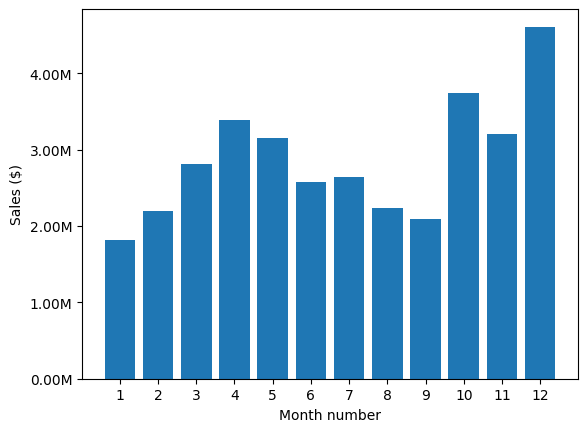

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


months=range(1,13)
sales=max_sales['sum']
plt.bar(months, sales )
plt.xticks(months)
plt.xlabel('Month number')
plt.ylabel('Sales ($)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.2f}M'))
plt.savefig(fig_save_folder+'sales_by_month.png')
plt.show()




##### What cities have highest number of sales


In [13]:
def get_city(address):
    return address.split(',')[1]
    
def get_state(address):
    return address.split(',')[2].split(' ')[1]
   

all_data['City']=all_data['Purchase Address'].apply(lambda x:get_city(x)+' '+get_state(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Date,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019-04-19,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019-04-07,99.99,Boston MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019-04-12,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019-04-12,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019-04-30,11.99,Los Angeles CA


In [14]:
max_sale_city=all_data.groupby('City')['Sales'].agg(['sum']).sort_values(by='sum', ascending=True)

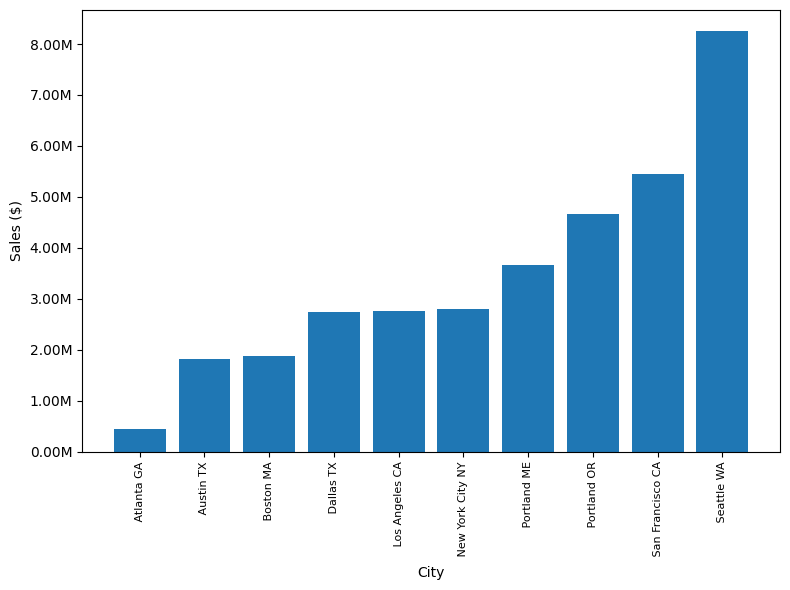

In [15]:
import matplotlib.pyplot as plt

cities=[city for city ,df in all_data.groupby('City')]

sales = max_sale_city['sum']

plt.figure(figsize=(8, 6))  # Adjust the figure size as desired
plt.bar(cities, sales)
plt.xlabel('City')
plt.ylabel('Sales ($)')
plt.xticks(cities, rotation='vertical', size=8)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.2f}M'))

plt.tight_layout()  # Adjust the spacing between the plot and the edges of the figure
plt.savefig(fig_save_folder+'sales_by_city.png')
plt.show()



##### What are the most popular products in each country

In [16]:
sum=all_data.groupby(['City','Product'])['Quantity Ordered'].agg(['sum']).reset_index()


sum=sum.sort_values(['City','sum'], ascending=[True,False])

Top5_products_city=sum.groupby('City').head(5)


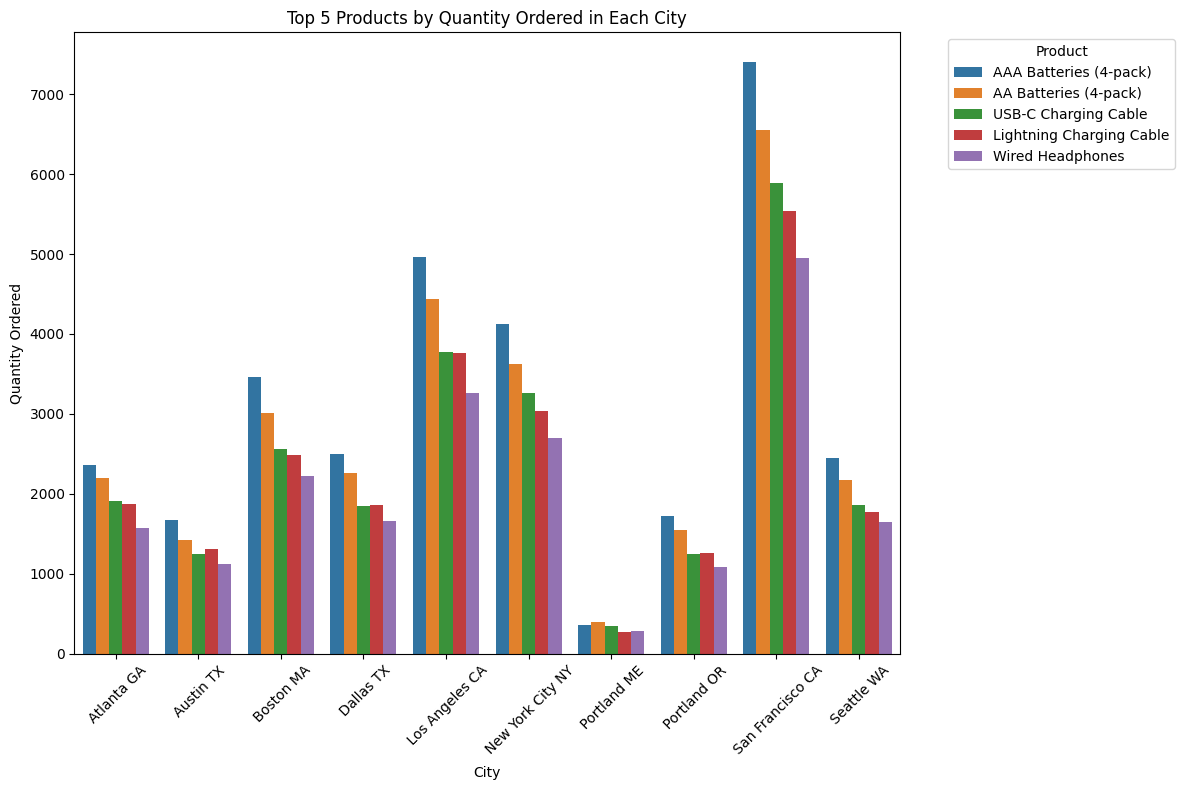

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming top_3_products_per_city is the DataFrame you obtained earlier
plt.figure(figsize=(12, 8))

# Create a grouped bar chart
sns.barplot(x='City', y='sum', hue='Product', data=Top5_products_city)

plt.title('Top 5 Products by Quantity Ordered in Each City')
plt.xlabel('City')
plt.ylabel('Quantity Ordered')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(fig_save_folder+'top5_products.png')
plt.show()


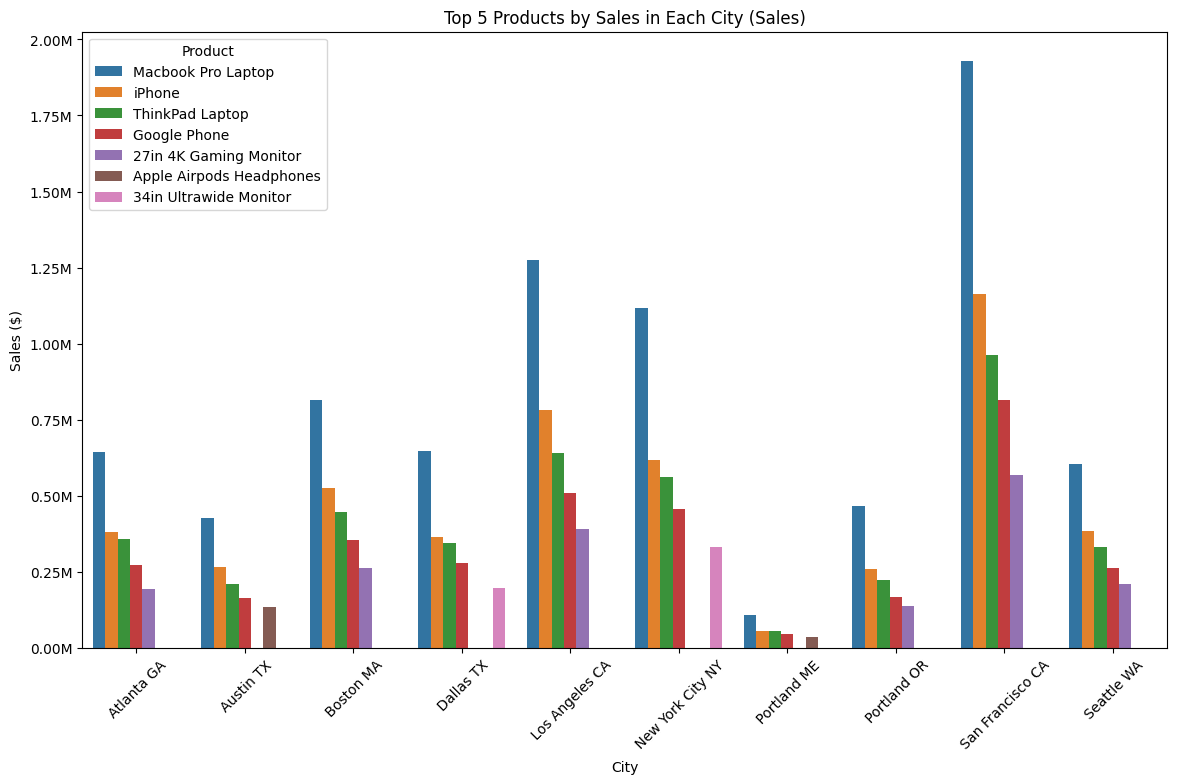

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

city_product_sales = all_data.groupby(['City', 'Product'])['Sales'].sum().reset_index()


top_5_products_per_city = city_product_sales.groupby('City').apply(
    lambda x: x.nlargest(5, 'Sales')
).reset_index(drop=True)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='City', y='Sales', hue='Product', data=top_5_products_per_city)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.2f}M'))

# Title and labels
plt.title('Top 5 Products by Sales in Each City (Sales)')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.ylabel('Sales ($)')
plt.savefig(fig_save_folder+'top5_products_sales.png')
# Show the plot
plt.show()


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming top_3_products_per_city is the DataFrame you obtained earlier
plt.figure(figsize=(12, 8))

# Create a grouped bar chart
sns.barplot(x='City', y='sum', hue='Product', data=Top5_products_sales)

plt.title('Top 5 Products by Quantity Ordered in Each City')
plt.xlabel('City')
plt.ylabel('Quantity Ordered')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(fig_save_folder+'top5_products.png')
plt.show()


NameError: name 'Top5_products_sales' is not defined

<Figure size 1200x800 with 0 Axes>

In [20]:
import pandas as pd

# Assuming 'all_data' is your DataFrame and it contains columns 'City', 'Product', and 'Quantity Ordered'

# Filter the data for the city "Portland, Mexico"
portland_mexico_data = all_data[all_data['City'] == ' Portland ME']

top_products_portland_mexico = portland_mexico_data.groupby('Product')['Quantity Ordered'].sum().reset_index()

# Sort the products by the quantity ordered in descending order and select the top 5
top_5_products = top_products_portland_mexico.sort_values(by='Quantity Ordered', ascending=False).head(5)

# Display the result
print(top_5_products)

                     Product  Quantity Ordered
4      AA Batteries (4-pack)               389
5     AAA Batteries (4-pack)               358
15      USB-C Charging Cable               339
17          Wired Headphones               279
12  Lightning Charging Cable               268


In [21]:

bottom5_products_city=sum.groupby('City').tail(5)
bottom5_products_city

,City,Product,sum
14,Atlanta GA,ThinkPad Laptop,357
0,Atlanta GA,20in Monitor,341
16,Atlanta GA,Vareebadd Phone,173
10,Atlanta GA,LG Dryer,59
11,Atlanta GA,LG Washing Machine,52
19,Austin TX,20in Monitor,230
33,Austin TX,ThinkPad Laptop,210
35,Austin TX,Vareebadd Phone,108
29,Austin TX,LG Dryer,55
30,Austin TX,LG Washing Machine,26


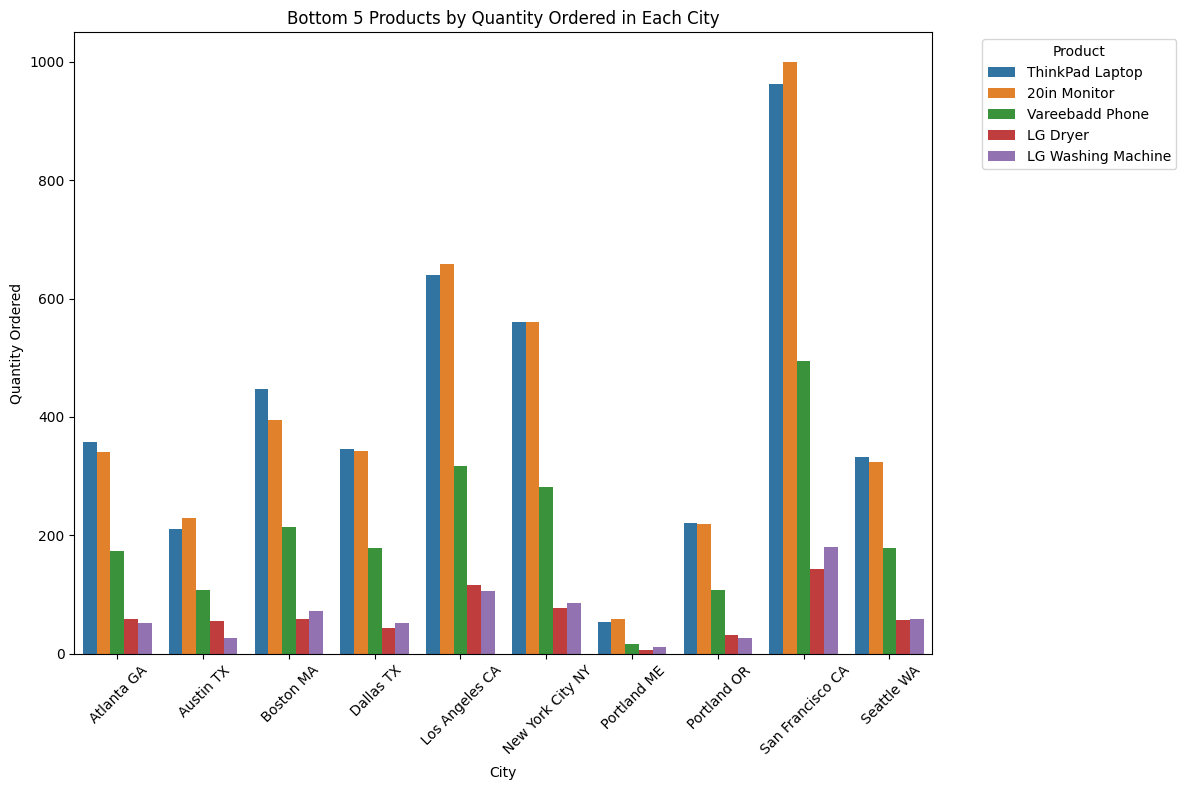

In [22]:


# Assuming top_3_products_per_city is the DataFrame you obtained earlier
plt.figure(figsize=(12, 8))

# Create a grouped bar chart
sns.barplot(x='City', y='sum', hue='Product', data=bottom5_products_city)

plt.title('Bottom 5 Products by Quantity Ordered in Each City')
plt.xlabel('City')
plt.ylabel('Quantity Ordered')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig(fig_save_folder+'bottom5_products.png')

plt.show()


##### Q3: What time is best for advertisements to maximize the likelihood of customers buying product

In [23]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

In [24]:
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Date,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019-04-19,23.90,Dallas TX,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019-04-07,99.99,Boston MA,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019-04-12,600.00,Los Angeles CA,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019-04-12,11.99,Los Angeles CA,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019-04-30,11.99,Los Angeles CA,9,27


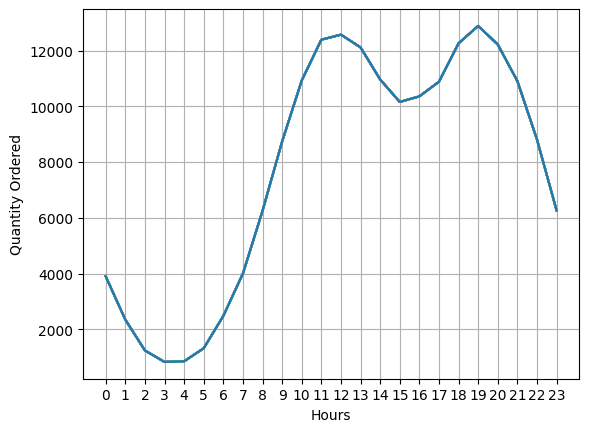

In [25]:
hours=[hour for hour ,df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.grid(True)
plt.xlabel('Hours')
plt.xticks(hours)
plt.ylabel('Quantity Ordered')
plt.savefig(fig_save_folder+'advertisement.png')

plt.show()

##### Q4: What products are the most often sold together

In [26]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df=df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
30,176586,"AAA Batteries (4-pack),Google Phone"
117,176672,"Lightning Charging Cable,USB-C Charging Cable"
127,176681,"Apple Airpods Headphones,ThinkPad Laptop"


#### Market basket analysis

In [27]:
from itertools import combinations
from collections import Counter

count=Counter()

for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list, 2)))

combo_df = pd.DataFrame(count.items(), columns=['Product_Pair', 'Count'])

# Sort the DataFrame by Count in descending order to get the most common pairs
combo_df = combo_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Display the top 10 most common product pairs
top_10_combo_df = combo_df.head(10)
top_10_combo_df

import dataframe_image as dfi
dfi.export(top_10_combo_df,fig_save_folder+'Mbucket.png')

#### Q5: What products was sold the most? Why do you think it sold the most?

In [28]:
most_sold=all_data.groupby('Product')['Quantity Ordered'].agg(['count']).reset_index()

In [29]:
most_sold.sort_values(by=['Product'])
most_sold

,Product,count
0,20in Monitor,4098
1,27in 4K Gaming Monitor,6225
2,27in FHD Monitor,7498
3,34in Ultrawide Monitor,6174
4,AA Batteries (4-pack),20558
5,AAA Batteries (4-pack),20612
6,Apple Airpods Headphones,15525
7,Bose SoundSport Headphones,13298
8,Flatscreen TV,4794
9,Google Phone,5522


In [30]:
most_sold['count'].mean()

9772.947368421053

In [31]:

prices=all_data.groupby('Product')['Price Each'].agg(['mean']).reset_index()
price=prices['mean']



In [32]:
price

0      109.99
1      389.99
2      149.99
3      379.99
4        3.84
5        2.99
6      150.00
7       99.99
8      300.00
9      600.00
10     600.00
11     600.00
12      14.95
13    1700.00
14     999.99
15      11.95
16     400.00
17      11.99
18     700.00
Name: mean, dtype: float64

<Figure size 1300x800 with 0 Axes>

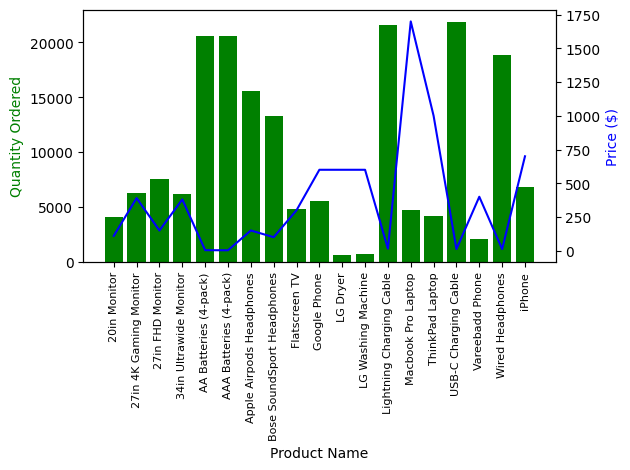

In [33]:
Product=most_sold['Product']
quantity_ordered=most_sold['count']
plt.figure(figsize=(13, 8))

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(Product, quantity_ordered, color='g')

ax2.plot(Product, price, 'b-')
plt.grid(False)
ax1.set_xlabel('Product Name')
ax1.set_xticklabels(Product, rotation='vertical', size=8)
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax2.grid(False)
plt.tight_layout()
plt.savefig(fig_save_folder+'Most_sold.png')

fig.show()


#### Remove the outliers in the price to find the expensive products

In [34]:
expensive_products=all_data.groupby(['Product']).agg(
    total_sales=('Sales', 'sum'),
    price=('Price Each', 'mean'),
    quantity_ordered=('Quantity Ordered', 'count')).reset_index()
expensive_products['total_sales'] = expensive_products['total_sales'] / 1_000_000




expensive_products

,Product,total_sales,price,quantity_ordered
0,20in Monitor,0.453819,109.99,4098
1,27in 4K Gaming Monitor,2.433148,389.99,6225
2,27in FHD Monitor,1.131075,149.99,7498
3,34in Ultrawide Monitor,2.352898,379.99,6174
4,AA Batteries (4-pack),0.106042,3.84,20558
5,AAA Batteries (4-pack),0.092648,2.99,20612
6,Apple Airpods Headphones,2.345550,150.00,15525
7,Bose SoundSport Headphones,1.342866,99.99,13298
8,Flatscreen TV,1.443900,300.00,4794
9,Google Phone,3.317400,600.00,5522


In [35]:
import dataframe_image as dfi
desc=expensive_products.describe()
dfi.export(desc,fig_save_folder+'desc.png')


In [40]:
under_pr = expensive_products[
    (expensive_products['total_sales'] < 900000) & 
    (expensive_products['quantity_ordered'] < 9000)
]


under_pr=under_pr.tail(3)

In [41]:
merged_products=all_data.merge(under_pr, on=['Product']).reset_index(drop=True)

merged_products

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Date,Sales,City,Hour,Minute,total_sales,price,quantity_ordered
0,176581,iPhone,1,700.00,2019-04-09 21:38:00,"84 Jackson St, Boston, MA 02215",4,2019-04-09,700.00,Boston MA,21,38,4.792900,700.00,6840
1,176608,iPhone,1,700.00,2019-04-11 12:01:00,"15 Cherry St, San Francisco, CA 94016",4,2019-04-11,700.00,San Francisco CA,12,1,4.792900,700.00,6840
2,176633,ThinkPad Laptop,1,999.99,2019-04-23 14:03:00,"863 Hickory St, Los Angeles, CA 90001",4,2019-04-23,999.99,Los Angeles CA,14,3,4.127959,999.99,4126
3,176635,Vareebadd Phone,1,400.00,2019-04-26 09:55:00,"85 North St, San Francisco, CA 94016",4,2019-04-26,400.00,San Francisco CA,9,55,0.827200,400.00,2065
4,176651,iPhone,1,700.00,2019-04-07 13:14:00,"997 South St, Boston, MA 02215",4,2019-04-07,700.00,Boston MA,13,14,4.792900,700.00,6840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13026,259320,ThinkPad Laptop,1,999.99,2019-09-02 10:51:00,"857 Elm St, Atlanta, GA 30301",9,2019-09-02,999.99,Atlanta GA,10,51,4.127959,999.99,4126
13027,259321,ThinkPad Laptop,1,999.99,2019-09-25 16:09:00,"418 Hickory St, Los Angeles, CA 90001",9,2019-09-25,999.99,Los Angeles CA,16,9,4.127959,999.99,4126
13028,259345,ThinkPad Laptop,1,999.99,2019-09-21 23:12:00,"406 Dogwood St, San Francisco, CA 94016",9,2019-09-21,999.99,San Francisco CA,23,12,4.127959,999.99,4126
13029,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,2019-09-01,700.00,San Francisco CA,16,0,4.792900,700.00,6840


In [42]:


under_performing_products=merged_products.groupby(['Month','Product']).agg(
    Sales=('Sales', 'sum'))


under_performing_products.reset_index(inplace=True)
under_performing_products

,Month,Product,Sales
0,1,ThinkPad Laptop,218997.81
1,1,Vareebadd Phone,50400.00
2,1,iPhone,266700.00
3,2,ThinkPad Laptop,274997.25
4,2,Vareebadd Phone,51600.00
5,2,iPhone,306600.00
6,3,ThinkPad Laptop,344996.55
7,3,Vareebadd Phone,69600.00
8,3,iPhone,376600.00
9,4,ThinkPad Laptop,389996.10


### forcast the sales for the uderperforming products to ensure restocking of the products

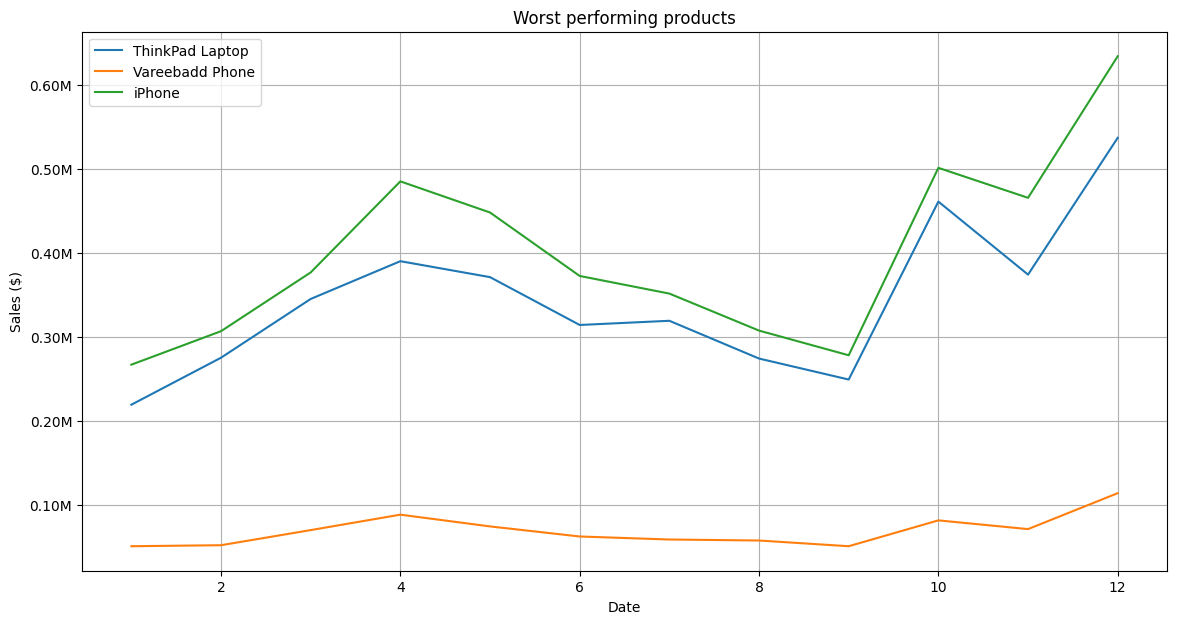

In [43]:

plt.figure(figsize=(14, 7))

for product in under_performing_products['Product'].unique():
    
    product_data = under_performing_products[under_performing_products['Product'] == product]
    plt.plot(product_data['Month'], product_data['Sales'], label=product)
    
plt.title('Worst performing products')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.grid(True)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.2f}M'))
plt.savefig(fig_save_folder+'worst_products')
plt.show()


In [ ]:
expensive products bought by each country